# CV Model Comparison Results

In [ ]:
import os
import platform
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import font_manager as fm

import utils

font_path = r'C:\Users\Felix\AppData\Local\Microsoft\Windows\Fonts\SourceSansPro-Regular.ttf'
fm.fontManager.addfont(font_path)
source_sans_pro = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = source_sans_pro.get_name()

In [2]:
# STORE = False
STORE = True

In [3]:
df = pd.read_csv("data/runs-23_06_46-17-Apr-25.csv")

In [4]:
cv_runs = [name for name in df.experiment if name.split("_")[-1].split("-")[0] == "fold"]
print("# models:", len(cv_runs) / 3)

# models: 9.0


In [5]:
df_cv = df[df['experiment'].isin(cv_runs)]
df_cv = df_cv[["experiment", 'AUC_val', 'AUC_train', 'training_time_min', 'avg_epoch_time', 'nr_params', 'nr_flops', "best_epoch", "model_config.model"]]
df_cv["model_config.model"] = ["baseline_freq" if "freq" in name else model.strip("\"") for name, model in zip(df_cv["experiment"], df_cv["model_config.model"])]
df_cv = df_cv.rename(columns={'model_config.model': 'model', "avg_epoch_time": "min_per_epoch"})
df_cv = df_cv.drop("experiment", axis=1)
cols_to_convert = [col for col in df_cv.columns if col != 'model']
df_cv[cols_to_convert] = df_cv[cols_to_convert].astype(float)

# custom colnames
df_cv.columns = ["val AUC", "train AUC", "train time (min.)", "min. per epoch", "# parameters", "# flops", "best epoch", "model"]

# add rfr baseline results as separate runs
# RandomForestClassifier
# Mean Test ROC: 0.6511249520403964 0.006805343628861114
# {'fit_time': array([7.19223166, 7.37786293, 7.24737144]), 'score_time': array([0.31503367, 0.10961747, 0.10889411]), 'test_roc_auc': array([0.6419549 , 0.65317981, 0.65824014]), 'train_roc_auc': array([1., 1., 1.])}

rfr_baseline = pd.DataFrame({
    "val AUC": [0.6419549 , 0.65317981, 0.65824014],
    "train AUC": [1] * 3,
    "train time (min.)": [7.19223166 / 60, 7.37786293 / 60, 7.24737144 / 60],
    "min. per epoch": [np.nan] * 3,
    "# parameters": [np.nan] * 3,
    "# flops": [np.nan] * 3,
    "best epoch": [np.nan] * 3,
    "model": ["RFR (freq)"] * 3
})

df_cv = pd.concat([df_cv, rfr_baseline], axis=0)
df_cv.reset_index(drop=True, inplace=True)

In [6]:
df_cv

,val AUC,train AUC,train time (min.),min. per epoch,# parameters,# flops,best epoch,model
0,0.657251,0.704090,39.248700,1.266087,610305.0,1.614129e+09,31.0,transformer
1,0.660854,0.711962,52.531600,1.281259,610305.0,1.614129e+09,41.0,transformer
2,0.645477,0.638470,0.330100,0.047157,6017.0,2.765968e+06,7.0,mamba
3,0.669739,0.725262,2.177400,0.038882,6017.0,2.765968e+06,56.0,mamba
4,0.669819,0.693098,35.380400,1.263586,610305.0,1.614129e+09,28.0,transformer
5,0.673700,0.689669,1.395400,0.046513,6017.0,2.765968e+06,30.0,mamba
6,0.667018,0.688025,181.601300,4.223286,90177.0,3.392571e+09,43.0,xlstm
7,0.670213,0.703238,255.581700,4.259695,90177.0,3.392571e+09,60.0,xlstm
8,0.667602,0.687689,194.257300,4.222985,90177.0,3.392571e+09,46.0,xlstm
9,0.715146,0.703358,4.210000,0.066825,42449.0,4.147200e+04,63.0,baseline_freq


In [7]:
df_grouped = df_cv.groupby("model").mean()
df_grouped

,val AUC,train AUC,train time (min.),min. per epoch,# parameters,# flops,best epoch
model,,,,,,,
LegNet,0.683815,0.700336,19.136967,0.387682,3364685.0,1.368158e+08,49.333333
RFR (freq),0.651125,1.000000,0.121208,NaN,NaN,NaN,NaN
baseline,0.638577,0.727409,0.817967,0.163571,44276097.0,4.426970e+07,5.000000
baseline_freq,0.712446,0.709650,4.998600,0.063063,42449.0,4.147200e+04,80.000000
cnn,0.672494,0.699688,1.067600,0.075239,111537.0,2.987200e+04,14.333333
gru,0.668099,0.688153,52.380200,1.217901,11298817.0,7.072000e+04,43.000000
lstm,0.653823,0.677799,29.093267,0.671578,616961.0,1.772800e+04,43.333333
mamba,0.662972,0.684467,1.300967,0.044184,6017.0,2.765968e+06,31.000000
transformer,0.662641,0.703050,42.386900,1.270310,610305.0,1.614129e+09,33.333333


In [8]:
df_grouped_std = df_cv.groupby("model").std()
df_grouped_std.columns = [f"{col} std" for col in df_grouped_std.columns]
df_grouped_std

,val AUC std,train AUC std,train time (min.) std,min. per epoch std,# parameters std,# flops std,best epoch std
model,,,,,,,
LegNet,0.002910,0.005697,3.205090,0.002731,0.0,0.0,8.020806
RFR (freq),0.008335,0.000000,0.001589,NaN,NaN,NaN,NaN
baseline,0.006467,0.030075,0.163426,0.002646,0.0,0.0,1.000000
baseline_freq,0.004297,0.011537,0.916773,0.003690,0.0,0.0,19.313208
cnn,0.008954,0.009983,0.164480,0.005489,0.0,0.0,3.214550
gru,0.005866,0.009555,4.598543,0.006902,0.0,0.0,3.605551
lstm,0.005071,0.007393,5.803202,0.001680,0.0,0.0,8.736895
mamba,0.015280,0.043630,0.927263,0.004603,0.0,0.0,24.515301
transformer,0.006471,0.009475,8.995951,0.009563,0.0,0.0,6.806859


In [9]:
# add all information
df_grouped = pd.concat([df_grouped, df_grouped_std], axis=1)

# change model names
df_grouped = df_grouped.rename(index={
    "baseline": "Baseline MLP",
    "baseline_freq": "Baseline MLP (freq)",
    "cnn": "CNN",
    "gru": "GRU",
    "lstm": "LSTM",
    "mamba": "Mamba",
    "transformer": "Transformer",
    "xlstm": "xLSTM",
    "LEGnet": "LEGnet",
    "RFC (freq)": "RFC (freq)"
})

## Results barplots

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

def plot_variable(df_plot, var, x_min=0, log_scale=False, use_sem=False, use_ci=False, store=False):
    # Sort dataframe by the variable to plot
    df_plot = df_plot.sort_values(var)
    df_plot.sort_values(by=var, inplace=True)
    
    # Compute uncertainty (SEM or SD)
    if use_ci:
        N = 3  # Number of CV runs
        df = N - 1  # Degrees of freedom
        t_critical = t.ppf(0.975, df)  # t-value for 95% confidence interval
        uncertainty = df_plot[f"{var} std"] / np.sqrt(N) * t_critical
    elif use_sem:
        uncertainty = df_plot[f"{var} std"] / np.sqrt(3)
    else:
        uncertainty = df_plot[f"{var} std"]
    
    # Plot the data with error bars
    plt.figure(figsize=(7, 3.5))
    if use_ci or use_sem:
        #plt.errorbar(df_plot[var], df_plot.index, xerr=uncertainty, fmt='o', color='skyblue', ecolor='lightgray', elinewidth=2, capsize=0)
        plt.barh(df_plot.index, df_plot[var], xerr=uncertainty, color='skyblue', capsize=2, ecolor="gray")
        plt.title(f"Mean {var} \n (with uncertainty over 3 folds)")
    else:
        plt.barh(df_plot.index, df_plot[var], xerr=uncertainty, color='skyblue')
        plt.title(f"Mean {var} \n (over 3 folds)")
    plt.xlabel(var)
    
    # Set x-axis limits and scaling
    if x_min:
        plt.xlim(x_min, df_plot[var].max() * 1.03)
    if log_scale:
        plt.xscale('log')

    if store:
        var_name = var.replace(" ", "_")
        plt.savefig(os.getenv("OUTPUT_DIR") + f"/cv_results_{var_name}.pdf", format="pdf", bbox_inches="tight")

    # Display the plot
    plt.show()

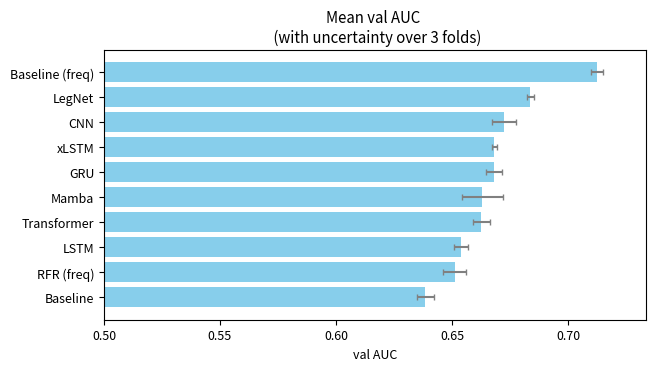

In [60]:
plot_variable(df_grouped.copy(), "val AUC", x_min=0.5, use_sem=True, store=STORE)

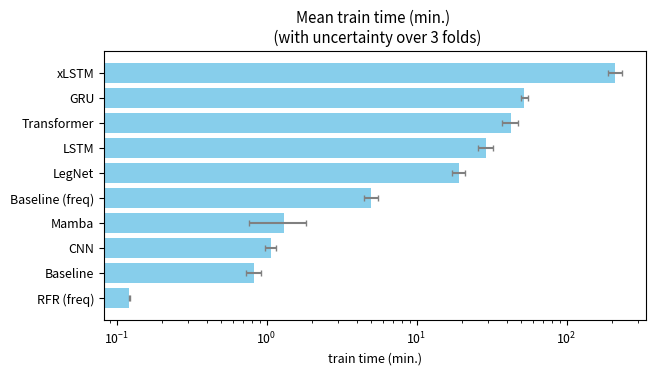

In [61]:
plot_variable(df_grouped.copy(), "train time (min.)", log_scale=True, use_sem=True)

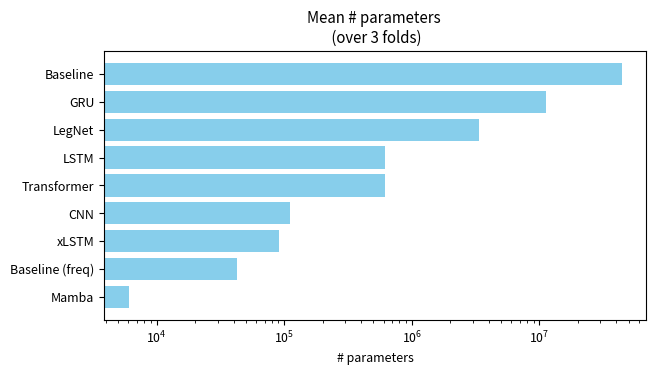

In [62]:
plot_variable(df_grouped.copy(), "# parameters", log_scale=True)

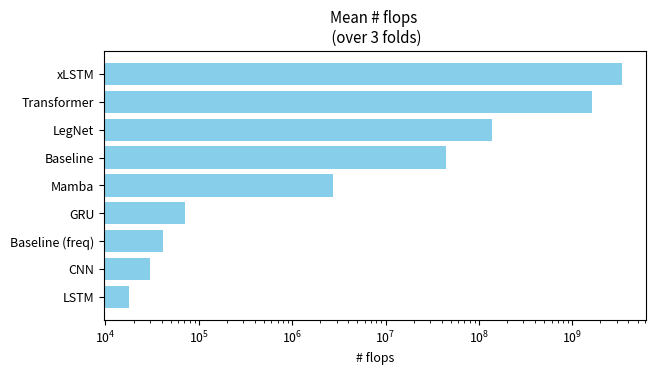

In [63]:
plot_variable(df_grouped.copy(), "# flops", log_scale=True)

## Results Table

In [11]:
df_table = df_grouped.copy()
df_table.sort_values(by="val AUC", ascending=False, inplace=True)
df_table.reset_index(inplace=True)
df_table = df_table.round(5)
#df_table.drop(["avg_epoch_time"], axis=1, inplace=True)
df_table[["# parameters", "# flops"]] = df_table[["# parameters", "# flops"]].astype(pd.Int64Dtype())

In [12]:
df_table

,model,val AUC,train AUC,train time (min.),min. per epoch,# parameters,# flops,best epoch,val AUC std,train AUC std,train time (min.) std,min. per epoch std,# parameters std,# flops std,best epoch std
0,Baseline (freq),0.71245,0.70965,4.99860,0.06306,42449,41472,80.00000,0.00430,0.01154,0.91677,0.00369,0.0,0.0,19.31321
1,LegNet,0.68381,0.70034,19.13697,0.38768,3364685,136815770,49.33333,0.00291,0.00570,3.20509,0.00273,0.0,0.0,8.02081
2,CNN,0.67249,0.69969,1.06760,0.07524,111537,29872,14.33333,0.00895,0.00998,0.16448,0.00549,0.0,0.0,3.21455
3,xLSTM,0.66828,0.69298,210.48010,4.23532,90177,3392570704,49.66667,0.00170,0.00888,39.56841,0.02111,0.0,0.0,9.07377
4,GRU,0.66810,0.68815,52.38020,1.21790,11298817,70720,43.00000,0.00587,0.00956,4.59854,0.00690,0.0,0.0,3.60555
5,Mamba,0.66297,0.68447,1.30097,0.04418,6017,2765968,31.00000,0.01528,0.04363,0.92726,0.00460,0.0,0.0,24.51530
6,Transformer,0.66264,0.70305,42.38690,1.27031,610305,1614129280,33.33333,0.00647,0.00947,8.99595,0.00956,0.0,0.0,6.80686
7,LSTM,0.65382,0.67780,29.09327,0.67158,616961,17728,43.33333,0.00507,0.00739,5.80320,0.00168,0.0,0.0,8.73689
8,RFR (freq),0.65112,1.00000,0.12121,NaN,<NA>,<NA>,NaN,0.00833,0.00000,0.00159,NaN,NaN,NaN,NaN
9,Baseline,0.63858,0.72741,0.81797,0.16357,44276097,44269696,5.00000,0.00647,0.03008,0.16343,0.00265,0.0,0.0,1.00000


In [13]:
df_table.columns

Index(['model', 'val AUC', 'train AUC', 'train time (min.)', 'min. per epoch',
       '# parameters', '# flops', 'best epoch', 'val AUC std', 'train AUC std',
       'train time (min.) std', 'min. per epoch std', '# parameters std',
       '# flops std', 'best epoch std'],
      dtype='object')

In [14]:
df_table = df_table[['model', 'val AUC', 'train AUC', 'train time (min.)',
                     '# parameters', '# flops', 'min. per epoch', 'best epoch']]
df_table.columns = ['model', 'mean val AUC', ' mean train AUC', 'mean train time (min.)', 'mean # parameters',
                    '# flops', 'min. per epoch', 'best epoch']

In [15]:
def transparent_nan(val):
    if pd.isnull(val) or val is pd.NA:
        return 'background-color: white; color: white;'
    return ''

styled_df = (
    df_table.style
    .background_gradient(subset=['mean val AUC'], cmap='Greens')  # Color scale for 'val AUC'
    .background_gradient(subset=['mean train time (min.)'], cmap='Reds')  # Color scale for 'train time'
    .background_gradient(subset=['mean # parameters'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['# flops'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['min. per epoch'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['best epoch'], cmap='Reds')  # Color scale for '# Parameters'
    .map(transparent_nan)
    .format(precision=4)
)

styled_df

,model,mean val AUC,mean train AUC,mean train time (min.),mean # parameters,# flops,min. per epoch,best epoch
0,Baseline (freq),0.7125,0.7097,4.9986,42449,41472,0.0631,80.0000
1,LegNet,0.6838,0.7003,19.1370,3364685,136815770,0.3877,49.3333
2,CNN,0.6725,0.6997,1.0676,111537,29872,0.0752,14.3333
3,xLSTM,0.6683,0.6930,210.4801,90177,3392570704,4.2353,49.6667
4,GRU,0.6681,0.6882,52.3802,11298817,70720,1.2179,43.0000
5,Mamba,0.6630,0.6845,1.3010,6017,2765968,0.0442,31.0000
6,Transformer,0.6626,0.7030,42.3869,610305,1614129280,1.2703,33.3333
7,LSTM,0.6538,0.6778,29.0933,616961,17728,0.6716,43.3333
8,RFR (freq),0.6511,1.0000,0.1212,,,nan,nan
9,Baseline,0.6386,0.7274,0.8180,44276097,44269696,0.1636,5.0000


In [ ]:
# FIXME
if STORE:
    from html2image import Html2Image

    # write to html
    html_path = os.path.join(os.getenv("OUTPUT_DIR"), "cv_results.html")
    with open(html_path, "w", encoding="utf-8") as f:
        f.write(styled_df.to_html())

    html_path = os.path.join(os.getenv("OUTPUT_DIR"), "cv_results.html")
    hti = Html2Image(output_path=os.getenv("OUTPUT_DIR"))
    hti.screenshot(html_file=html_path, save_as="cv_results.png")#, size=(1000, 500))

In [18]:
# TESTING
hti = Html2Image(output_path=os.getenv("OUTPUT_DIR"), browser="edge", size=(500, 200))
hti.screenshot(url='https://www.python.org', save_as='python_org.png')

['C:\\Users\\Felix\\code\\uni\\UniVie\\master-thesis-text\\assets\\data_viz\\python_org.png']